## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
dataset_df=pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display Tumor Volume (mm3) with one decimal place
dataset_df['Tumor Volume (mm3)']=dataset_df['Tumor Volume (mm3)'].map("{:,.1f}".format)
# Change tumor volume column to float so values can be used on following analyses
dataset_df['Tumor Volume (mm3)']=dataset_df['Tumor Volume (mm3)'].map(float)
dataset_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,k403,Ramicane,Male,21,16,5,38.8,0
2,k403,Ramicane,Male,21,16,10,35.0,1
3,k403,Ramicane,Male,21,16,15,34.2,1
4,k403,Ramicane,Male,21,16,20,33.0,1


## Summary statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summarystats=dataset_df[['Drug Regimen','Tumor Volume (mm3)']]
assignee_group=summarystats.groupby(['Drug Regimen'])
#Mean tumor vol
mean_tumor_vol=assignee_group['Tumor Volume (mm3)'].mean()
median_tumor_vol=assignee_group['Tumor Volume (mm3)'].median()
variance_tumor_vol=assignee_group['Tumor Volume (mm3)'].var()
stddev_tumor_vol=assignee_group['Tumor Volume (mm3)'].std()
stderr_tumor_vol=assignee_group['Tumor Volume (mm3)'].sem()

#summary table
summarystats=pd.DataFrame({'Mean Tumor Volume':mean_tumor_vol,
                          'Median Tumor Volume':median_tumor_vol,
                          'Tumor Volume Variance':variance_tumor_vol,
                          'Tumor Volume Std. Dev.':stddev_tumor_vol,
                          'Tumor Volume Std. Err.':stderr_tumor_vol,})

summarystats.head(10)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.678261,41.55,24.954809,4.995479,0.329392
Ceftamin,52.589326,51.80,39.254292,6.265325,0.469606
Infubinol,52.885955,51.80,43.074321,6.563103,0.491925
Ketapril,55.237766,53.70,68.553379,8.279697,0.603859
Naftisol,54.330108,52.50,66.178440,8.135013,0.596488
Placebo,54.032044,52.30,61.148079,7.819724,0.581235
Propriva,52.322360,50.90,42.384622,6.510347,0.513087
Ramicane,40.217982,40.70,23.472054,4.844797,0.320854
Stelasyn,54.235359,52.40,59.453965,7.710640,0.573127


## Bar plots

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

In [7]:
groupby_points=dataset_df.groupby(['Drug Regimen'])
count_data_points=groupby_points['Timepoint'].count().sort_values(ascending=False)

#Summary table
datapoints_summary_table=pd.DataFrame(count_data_points)
datapoints_summary_table=datapoints_summary_table.sort_values(by=['Timepoint'], ascending=False)
datapoints_summary_table


,Timepoint
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Infubinol,178
Ceftamin,178


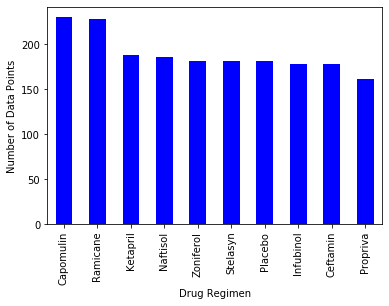

In [8]:
# Create histogram using Pandas
datapoints_summary_table.plot(kind='bar', facecolor='blue',legend=None)
plt.ylabel('Number of Data Points')
plt.xlabel('Drug Regimen')
plt.show()

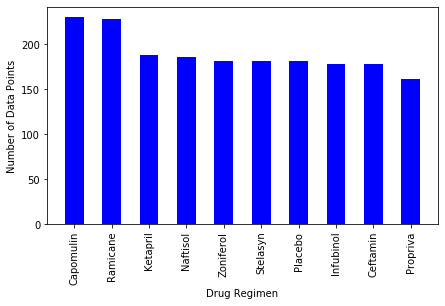

In [9]:
# Create histogram using pyplot
plt.figure(figsize=(7,4))
plt.bar(count_data_points.index.values,count_data_points.values, color="blue", align="center", width=0.5)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()

## Pie plots

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group=dataset_df.groupby(['Sex'])
gender_count=gender_group['Mouse ID'].nunique()
st_df = pd.DataFrame(gender_count)
st_df['Percentage']=((gender_count/sum(gender_count))*100).round(2)
st_df.head()

,Mouse ID,Percentage
Sex,,
Female,124,49.8
Male,125,50.2


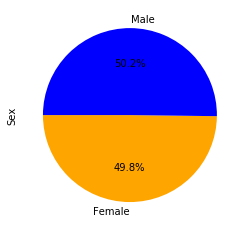

In [11]:
#plt.figure()
colors = ['orange','blue']
Sex_distribution_pie=st_df['Percentage'].plot(kind='pie', y=gender_group, autopct='%1.1F%%', colors=colors, startangle=180)
plt.ylabel('Sex')
plt.show()



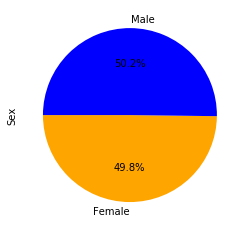

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=['Female','Male']
plt.pie(st_df['Percentage'], autopct='%1.1F%%', labels=labels, colors=colors,startangle=180)
plt.ylabel('Sex')
plt.show()

## Quartiles, outliers and boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Get the last timepoint for each mouse
max_tumor = dataset_df.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()
max_tumor.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,68.0,2
1,a251,Infubinol,Female,21,25,45,65.5,1
2,a262,Placebo,Female,17,29,45,70.7,4
3,a275,Ceftamin,Female,20,28,45,63.0,3
4,a366,Stelasyn,Female,16,29,30,63.4,1


In [14]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor[['Mouse ID','Timepoint']].merge(dataset_df,on=['Mouse ID','Timepoint'],how="left")
merged_data.head(36)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,68.0,2
1,a251,45,Infubinol,Female,21,25,65.5,1
2,a262,45,Placebo,Female,17,29,70.7,4
3,a275,45,Ceftamin,Female,20,28,63.0,3
4,a366,30,Stelasyn,Female,16,29,63.4,1
5,a401,45,Zoniferol,Female,8,25,66.8,4
6,a411,45,Ramicane,Male,3,22,38.4,1
7,a444,45,Ramicane,Female,10,25,43.0,0
8,a457,10,Ketapril,Female,11,30,49.8,0
9,a492,45,Stelasyn,Male,20,25,60.1,1


In [15]:
capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
capomulin.head(100)

19     39.0
24     38.9
61     30.5
64     37.1
66     40.2
81     47.7
84     37.3
86     38.1
88     38.8
109    41.5
116    38.8
122    28.4
125    33.3
163    46.5
164    32.4
170    41.6
175    23.3
181    40.7
184    34.5
193    31.0
205    40.7
209    40.0
221    36.0
227    28.5
240    31.9
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# Quantitatively determine capomulin outliers
cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_quartiles

0.25    32.4
0.50    38.1
0.75    40.2
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# Determine individual variables for outlier calculation
cap_lowerq = cap_quartiles[0.25]
cap_medq = cap_quartiles[0.50]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

print(f'The lower quartile of occupancy is: {cap_lowerq.round(2)}')
print(f'The upper quartile of occupancy is: {cap_upperq.round(2)}')
print(f'The interquartile range of occupancy is: {cap_iqr.round(2)}')
print(f'The median of occupancy is: {cap_medq.round(2)}')
print(f'Values below {cap_lower_bound.round(3)} could be outliers.')
print(f'Values above {cap_upper_bound.round(3)} could be outliers.')

The lower quartile of occupancy is: 32.4
The upper quartile of occupancy is: 40.2
The interquartile range of occupancy is: 7.8
The median of occupancy is: 38.1
Values below 20.7 could be outliers.
Values above 51.9 could be outliers.


In [18]:
print(f"Capomulin potential outliers: {capomulin.loc[(capomulin < cap_lower_bound) | (capomulin > cap_upper_bound)]}")
print(f'- No potential outliers where found')

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
- No potential outliers where found


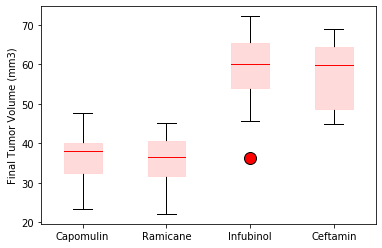

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#variables
Capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
Ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
Infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
Ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

#combine all regimens into a list
data_to_plot=[Capomulin, Ramicane, Infubinol, Ceftamin]

fig = plt.figure(1)
ax= fig.add_subplot(111)

# add labels
ax.set_ylabel('Final Tumor Volume (mm3)')
#ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

# modify colors
bp=ax.boxplot(data_to_plot, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], patch_artist=True)

for flier in bp['fliers']:
    flier.set(marker='o', markerfacecolor='r', markersize=12)

for median in bp['medians']:
    median.set(color='r')
    
for box in bp['boxes']:
    box.set(color='#FFD3D3D3')
    
plt.show()

## Line and scatter plots

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouseID='l509'
Mouse_and_regimen=dataset_df.loc[(dataset_df['Mouse ID']==mouseID) & (dataset_df['Drug Regimen']=='Capomulin')]
Mouse_and_regimen.head(30)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.0,0
372,l509,Capomulin,Male,17,21,5,45.9,0
373,l509,Capomulin,Male,17,21,10,46.8,0
374,l509,Capomulin,Male,17,21,15,47.5,1
375,l509,Capomulin,Male,17,21,20,48.1,2
376,l509,Capomulin,Male,17,21,25,44.0,2
377,l509,Capomulin,Male,17,21,30,44.7,2
378,l509,Capomulin,Male,17,21,35,40.2,2
379,l509,Capomulin,Male,17,21,40,40.8,2
380,l509,Capomulin,Male,17,21,45,41.5,3


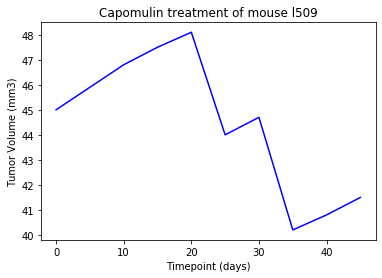

In [21]:
tp_tv=plt.plot(Mouse_and_regimen['Timepoint'],Mouse_and_regimen['Tumor Volume (mm3)'],color='blue',label='x')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse ' + mouseID)
plt.show()

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight=dataset_df.loc[(dataset_df['Weight (g)']) & (dataset_df['Drug Regimen']=='Capomulin')]
mouse_weight


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.0,0
11,s185,Capomulin,Female,3,17,5,43.9,0
12,s185,Capomulin,Female,3,17,10,37.6,0
13,s185,Capomulin,Female,3,17,15,38.2,0
14,s185,Capomulin,Female,3,17,20,36.9,0
...,...,...,...,...,...,...,...,...
390,r944,Capomulin,Male,12,25,45,41.6,2
1452,r157,Capomulin,Male,22,25,0,45.0,0
1453,r157,Capomulin,Male,22,25,5,45.6,0
1454,r157,Capomulin,Male,22,25,10,46.1,0


In [23]:
mouseID_group=mouse_weight.groupby(['Mouse ID','Weight (g)'])
average_vol=mouseID_group['Tumor Volume (mm3)'].mean()
df=pd.DataFrame({'Average volume (mm3)':average_vol})
df.head()

,,Average volume (mm3)
Mouse ID,Weight (g),
b742,21,40.0800
f966,17,36.5000
g288,19,42.0100
j119,23,44.4600
j246,21,43.2125


In [24]:
# reset index
new_df=df.reset_index(level='Weight (g)')
new_df.head()

,Weight (g),Average volume (mm3)
Mouse ID,,
b742,21,40.0800
f966,17,36.5000
g288,19,42.0100
j119,23,44.4600
j246,21,43.2125


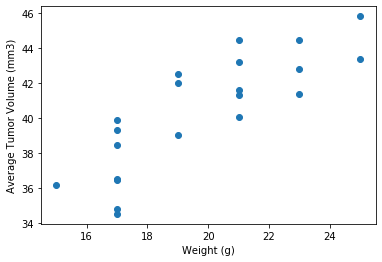

In [25]:
# x_values=df['Weight (g)'].astype('float')
x_values=new_df['Weight (g)']
y_values=new_df['Average volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The r-squared value is 0.8305286799976266


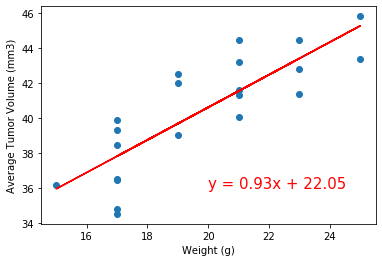

In [26]:
# Calculate the correlation coefficient and linear regression model for mouse weight 
# and average tumor volume for the Capomulin regimen
x_values=new_df['Weight (g)']
y_values=new_df['Average volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f'The r-squared value is {rvalue}')
plt.show()

<h2>Observations or insights

1- The final tumor volume of each mouse across four regimens of interest (box plot) indicates that Capomulin and Ramicane achieved the lowest volume size when compared to Infubinol and Ceftamin. No potential outliers were found for Capomulin, Infubinol, and Ceftamin. The potential outlier for Infubinol was 36.3 mm3 on sample c326 at 5 days into treatment (below 36.75 mm3 -cap lower bound).

2- Capomuling treatment for mouse l509 graph depicts an increasing trend from 0 to 20 days of treatment (volume size increases), however at 20 days (volume 48.1 mm3) a decreasing trend begins.The lowest size volumen reduction is achieved at day 35 into the treatment (volume 40.2 mm3). Treatment continues, and the volume size of the tumor slightly increases to 41.5 mm3 (day 45). In general, volume results over time on mouse l509 indicate successful results using the capomuling treatment for tumor reduction. 

3- There is a good correlation (r-squared value of 0.83) between the mouse weight and the average tumor volume for the Capomulin regimen. Indicating successful results using the capomuling treatment for tumor reduction for the population of mouse treated with this drug. 